In [1]:
import numpy as np
import pandas as pd
from sklearn.naive_bayes import GaussianNB
import matplotlib.pyplot as plt
from google.colab import files
import seaborn as sns
import warnings
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, LinearRegression, ElasticNet
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix,accuracy_score
from sklearn import svm
from google.colab import drive
from sklearn.feature_selection import RFECV, RFE
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from scipy.stats import randint
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.svm import SVC
warnings.filterwarnings('ignore')

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [26]:
df = pd.read_csv('/content/drive/MyDrive/Heart-disease_Training Part.csv', delimiter='\,')
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 249 entries, 0 to 248
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       249 non-null    int64  
 1   sex       249 non-null    int64  
 2   cp        249 non-null    int64  
 3   trestbps  249 non-null    int64  
 4   chol      249 non-null    int64  
 5   fbs       249 non-null    int64  
 6   restecg   249 non-null    int64  
 7   thalach   249 non-null    int64  
 8   exang     249 non-null    int64  
 9   oldpeak   249 non-null    float64
 10  slope     249 non-null    int64  
 11  ca        249 non-null    int64  
 12  thal      249 non-null    int64  
 13  target    249 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 27.4 KB
None


In [27]:
df.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1


In [28]:
df.tail(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
239,35,1,0,126,282,0,0,156,1,0.0,2,0,3,0
240,70,1,2,160,269,0,1,112,1,2.9,1,1,3,0
241,59,0,0,174,249,0,1,143,1,0.0,1,0,2,0
242,64,1,0,145,212,0,0,132,0,2.0,1,2,1,0
243,57,1,0,152,274,0,1,88,1,1.2,1,1,3,0
244,56,1,0,132,184,0,0,105,1,2.1,1,1,1,0
245,48,1,0,124,274,0,0,166,0,0.5,1,0,3,0
246,56,0,0,134,409,0,0,150,1,1.9,1,2,3,0
247,66,1,1,160,246,0,1,120,1,0.0,1,3,1,0
248,54,1,1,192,283,0,0,195,0,0.0,2,1,3,0


In [29]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [30]:
# checking for null values
df.isna().sum()

,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalach,0
exang,0
oldpeak,0


In [31]:
# getting all the information about the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 249 entries, 0 to 248
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       249 non-null    int64  
 1   sex       249 non-null    int64  
 2   cp        249 non-null    int64  
 3   trestbps  249 non-null    int64  
 4   chol      249 non-null    int64  
 5   fbs       249 non-null    int64  
 6   restecg   249 non-null    int64  
 7   thalach   249 non-null    int64  
 8   exang     249 non-null    int64  
 9   oldpeak   249 non-null    float64
 10  slope     249 non-null    int64  
 11  ca        249 non-null    int64  
 12  thal      249 non-null    int64  
 13  target    249 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 27.4 KB


In [32]:
df.duplicated().sum()

1

In [33]:
df.drop_duplicates(inplace=True)

In [34]:
df.isnull().any()

,0
age,False
sex,False
cp,False
trestbps,False
chol,False
fbs,False
restecg,False
thalach,False
exang,False
oldpeak,False


In [35]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,248.000000,248.000000,248.000000,248.000000,248.000000,248.000000,248.000000,248.000000,248.000000,248.000000,248.000000,248.000000,248.000000,248.000000
mean,54.084677,0.657258,1.064516,131.330645,247.790323,0.141129,0.504032,152.415323,0.278226,0.944355,1.435484,0.604839,2.306452,0.661290
std,9.315700,0.475586,1.016001,17.455657,52.631524,0.348859,0.509012,21.898202,0.449031,1.108875,0.626564,0.955009,0.578668,0.474228
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,88.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.000000,0.000000,0.000000,120.000000,211.750000,0.000000,0.000000,140.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,54.500000,1.000000,1.000000,130.000000,243.000000,0.000000,0.500000,156.000000,0.000000,0.600000,2.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.250000,0.000000,1.000000,169.000000,1.000000,1.500000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [36]:
#checking the distribution of target variable
df['target'].value_counts()

,count
target,
1,164
0,84


data not balanced

In [37]:
# handling inbalance data
from imblearn.under_sampling import TomekLinks
from imblearn.over_sampling import SMOTE

In [38]:
x = df.drop(columns = 'target', axis=1)
y = df.target

In [39]:
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_smote, y_smote = smote.fit_resample(x, y)

tomek_links = TomekLinks()
X_resampled, y_resampled = tomek_links.fit_resample(X_smote, y_smote)

df_smote = pd.concat([pd.DataFrame(X_resampled, columns=x.columns), pd.DataFrame(y_resampled, columns=['target'])], axis=1)

In [40]:
df_smote.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [68]:
df_smote.shape

(317, 14)

In [42]:
X = df_smote.drop(['target'], axis=1)
y = df_smote['target']

Separating the target from features

the plots generated after this line will have a white grid background and use muted colors for visual elements ( preparing and visualizing data using seaborn)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12],
 [Text(0, 0, 'age'),
  Text(1, 0, 'sex'),
  Text(2, 0, 'cp'),
  Text(3, 0, 'trestbps'),
  Text(4, 0, 'chol'),
  Text(5, 0, 'fbs'),
  Text(6, 0, 'restecg'),
  Text(7, 0, 'thalach'),
  Text(8, 0, 'exang'),
  Text(9, 0, 'oldpeak'),
  Text(10, 0, 'slope'),
  Text(11, 0, 'ca'),
  Text(12, 0, 'thal')])

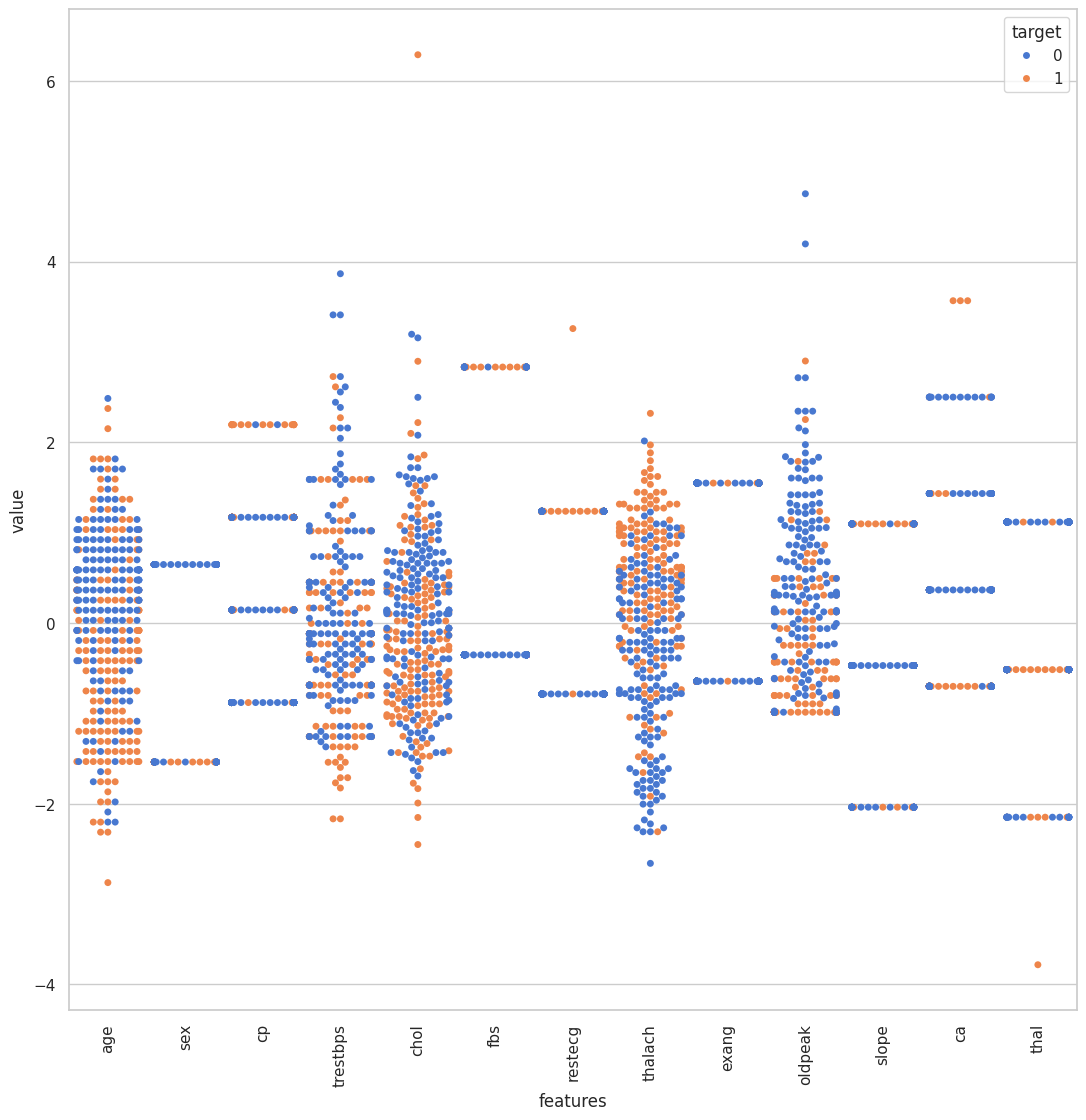

In [43]:
sns.set(style="whitegrid", palette="muted")
data = X
data_n_2 = (data - data.mean()) / (data.std())      # x data standardization
#y = pd.DataFrame(y)
data = pd.concat([y,data_n_2.iloc[:,0:13]],axis=1)
data = pd.melt(data,id_vars="target",
                    var_name="features",
                    value_name='value')
plt.figure(figsize=(13,13))
sns.swarmplot(x="features", y="value", hue="target", data=data)

plt.xticks(rotation=90)

In [44]:
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


<Axes: xlabel='target', ylabel='Count'>

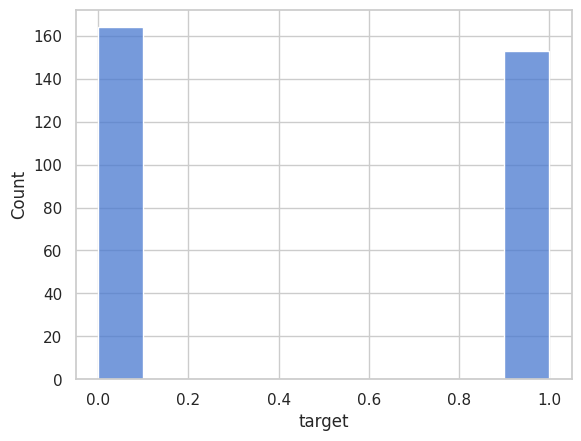

In [45]:
sns.histplot(y, label="count")

Correlation

In [46]:
X.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
age,1.000000,-0.075309,-0.100783,0.337660,0.290958,0.061341,-0.204084,-0.397599,0.100902,0.233537,-0.197909,0.354946,0.010462
sex,-0.075309,1.000000,-0.073366,-0.068035,-0.189677,0.096497,-0.077316,-0.030061,0.145285,0.095471,-0.063234,0.093589,0.131667
cp,-0.100783,-0.073366,1.000000,0.045984,-0.113485,0.185729,0.206417,0.321528,-0.290269,-0.191372,0.180530,-0.223218,-0.136746
trestbps,0.337660,-0.068035,0.045984,1.000000,0.199634,0.100244,-0.166889,-0.093285,0.121599,0.213155,-0.167010,0.098266,0.072193
chol,0.290958,-0.189677,-0.113485,0.199634,1.000000,-0.029855,-0.205723,0.003924,0.040664,-0.005911,0.016239,0.088920,0.089741
fbs,0.061341,0.096497,0.185729,0.100244,-0.029855,1.000000,-0.011833,0.056664,0.060394,-0.045608,0.023886,0.086436,0.015791
restecg,-0.204084,-0.077316,0.206417,-0.166889,-0.205723,-0.011833,1.000000,0.178474,-0.099425,-0.249060,0.302417,-0.148227,0.012529
thalach,-0.397599,-0.030061,0.321528,-0.093285,0.003924,0.056664,0.178474,1.000000,-0.364354,-0.381441,0.391677,-0.229202,-0.127316
exang,0.100902,0.145285,-0.290269,0.121599,0.040664,0.060394,-0.099425,-0.364354,1.000000,0.233309,-0.161805,0.073885,0.222857
oldpeak,0.233537,0.095471,-0.191372,0.213155,-0.005911,-0.045608,-0.249060,-0.381441,0.233309,1.000000,-0.598952,0.202179,0.253358


<Axes: >

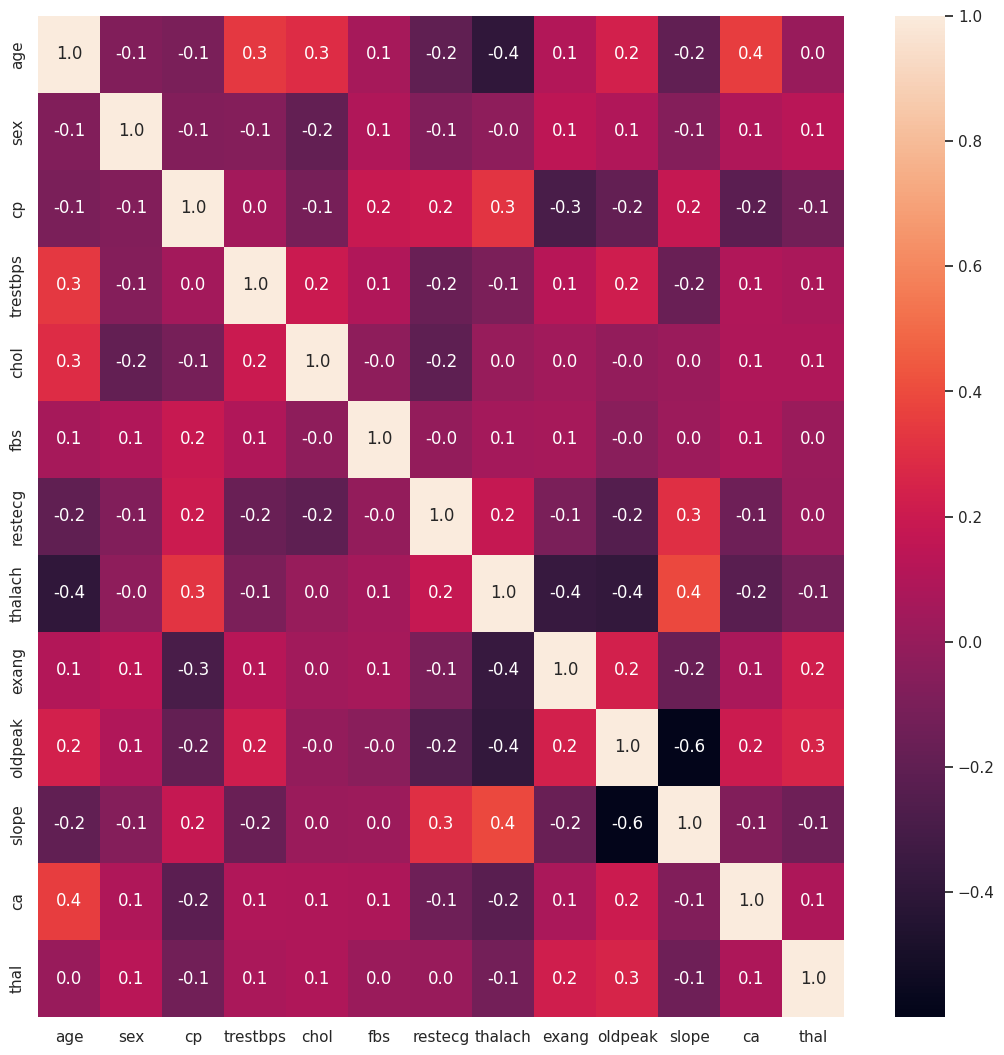

In [47]:
plt.figure(figsize=(13,13))
sns.heatmap(X.corr(), annot=True, fmt= '.1f')

In [69]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

feature selection

Data Standardization

In [70]:
standScal = StandardScaler()

In [71]:
s1 = X_train
s2 = X_test
x_train = standScal.fit_transform(s1)
x_test = standScal.fit_transform(s2)
display(x_train)
display(x_train.shape)
display(y_train)
display(y_train.shape)

array([[ 0.01445202,  0.65526982, -0.87029269, ..., -1.92287338,
        -0.71292153,  1.12631386],
       [-1.42593222, -1.52608891, -0.87029269, ..., -0.39783587,
        -0.71292153, -0.51137239],
       [-1.42593222,  0.65526982,  1.18750218, ..., -1.92287338,
        -0.71292153,  1.12631386],
       ...,
       [-1.97992616, -1.52608891,  1.18750218, ...,  1.12720164,
        -0.71292153, -0.51137239],
       [ 0.90084232,  0.65526982, -0.87029269, ...,  1.12720164,
         1.42162459, -2.14905864],
       [ 0.23604959,  0.65526982,  1.18750218, ...,  1.12720164,
         0.35435153,  1.12631386]])

(253, 13)

,target
209,0
76,1
94,1
221,0
309,0
...,...
188,0
71,1
106,1
270,0


(253,)

In [72]:
logistic = LogisticRegression()

In [73]:
logistic_param = [
    {'penalty' : ['l1', 'l2', 'elasticnet', 'none'],
    'C' : np.logspace(-4, 4, 20),
    'solver' : ['lbfgs','newton-cg','liblinear','sag','saga'],
    'max_iter' : [100, 1000,2500, 5000]
    }
]

In [74]:
logistic_grid_search = GridSearchCV(logistic, param_grid = logistic_param, cv = 3, verbose=True, n_jobs=-1)
logistic_grid_search.fit(x_train, y_train)

Fitting 3 folds for each of 1600 candidates, totalling 4800 fits


GridSearchCV(cv=3, estimator=LogisticRegression(), n_jobs=-1,
             param_grid=[{'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                          'max_iter': [100, 1000, 2500, 5000],
                          'penalty': ['l1', 'l2', 'elasticnet', 'none'],
                          'solver': ['lbfgs', 'newton-cg', 'liblinear', 'sag',
                                     'saga']}],
             verbose=True)

In [75]:
logistic_best_params = logistic_grid_search.best_params_
logistic_best_score = logistic_grid_search.best_score_

In [76]:
lg_random_search = RandomizedSearchCV(LogisticRegression(), param_distributions=logistic_param, scoring='accuracy', n_iter=100)

In [77]:
logistic = LogisticRegression(
  penalty = logistic_best_params['penalty'],
  C = logistic_best_params['C'],
  solver = logistic_best_params['solver'],
  max_iter = logistic_best_params['max_iter']
  )

logistic.fit(X_train, y_train)

LogisticRegression(C=0.615848211066026)

In [78]:
# accuracy score of the training data
x_train_prediction = logistic.predict(x_train)
training_data_accuracy = accuracy_score(x_train_prediction, y_train)

In [79]:
print('Accuracy score of the training data : ', f"{round(training_data_accuracy*100,2)}%")

Accuracy score of the training data :  86.56%


In [80]:
# accuracy score on the test data
logistic_prediction = logistic.predict(x_test)
test_data_accuracy = accuracy_score(logistic_prediction, y_test)

In [81]:
print('Accuracy score of the test data : ', f"{round(test_data_accuracy*100,2)}%" )

Accuracy score of the test data :  85.94%


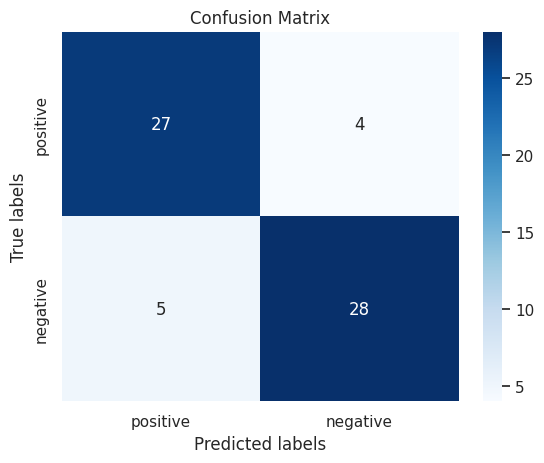

Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.87      0.86        31
           1       0.88      0.85      0.86        33

    accuracy                           0.86        64
   macro avg       0.86      0.86      0.86        64
weighted avg       0.86      0.86      0.86        64



In [82]:
matrix = confusion_matrix(y_test, logistic_prediction)
sns.heatmap(matrix, annot=True, fmt='d', cmap='Blues', xticklabels=["positive", "negative"], yticklabels=["positive", "negative"])
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

print("Classification Report:")
print(classification_report(y_test,logistic_prediction))

In [83]:
rfc = RandomForestClassifier()
rfc.fit(x_train, y_train)

RandomForestClassifier()

In [85]:
x_rfc_prediction = rfc.predict(x_train)
train_rfc_accuracy = accuracy_score(x_rfc_prediction, y_train)

In [86]:
print('Accuracy score of the training data : ', f"{round(train_rfc_accuracy*100,2)}%")

Accuracy score of the training data :  100.0%


In [88]:
x_rfc_test_prediction = rfc.predict(x_test)
test_rfc_accuracy = accuracy_score(x_rfc_test_prediction, y_test)

In [89]:
print('Accuracy score of the test data : ', f"{round(test_rfc_accuracy*100,2)}%")

Accuracy score of the test data :  85.94%


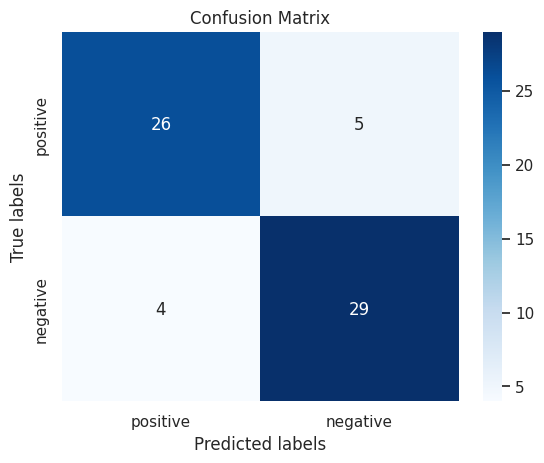

Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.84      0.85        31
           1       0.85      0.88      0.87        33

    accuracy                           0.86        64
   macro avg       0.86      0.86      0.86        64
weighted avg       0.86      0.86      0.86        64



In [90]:
matrix = confusion_matrix(y_test, x_rfc_test_prediction)
sns.heatmap(matrix, annot=True, fmt='d', cmap='Blues', xticklabels=["positive", "negative"], yticklabels=["positive", "negative"])
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

print("Classification Report:")
print(classification_report(y_test,x_rfc_test_prediction))

In [91]:
svm_param = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf', 'poly']
}

In [92]:
svm_random_search = RandomizedSearchCV(SVC(), param_distributions=svm_param, scoring='accuracy', n_iter=100)
svm_random_search.fit(X_train, y_train)

RandomizedSearchCV(estimator=SVC(), n_iter=100,
                   param_distributions={'C': [0.1, 1, 10],
                                        'kernel': ['linear', 'rbf', 'poly']},
                   scoring='accuracy')

In [93]:
svm_best_params_r = svm_random_search.best_params_
svm_best_score_r = svm_random_search.best_score_

In [94]:
svm_r = SVC(
  C = svm_best_params_r['C'],
  kernel = svm_best_params_r['kernel'])

svm_r.fit(X_train, y_train)

SVC(C=1, kernel='linear')

In [95]:
from sklearn.svm import SVC
svm_grid_search = GridSearchCV(SVC(), svm_param, cv=5, scoring='accuracy')
svm_grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10],
                         'kernel': ['linear', 'rbf', 'poly']},
             scoring='accuracy')

In [96]:
svm_best_params = svm_grid_search.best_params_
svm_best_score = svm_grid_search.best_score_

In [97]:
svm = SVC(
  C = svm_best_params['C'],
  kernel = svm_best_params['kernel'])

svm.fit(X_train, y_train)

SVC(C=1, kernel='linear')

In [98]:
# accuracy score of the training data
x_train_prediction = svm_r.predict(X_train)
training_data_accuracy = accuracy_score(x_train_prediction, y_train)

In [99]:
print('Accuracy score of the training data : ', f"{round(training_data_accuracy*100,2)}%")

Accuracy score of the training data :  90.91%


In [100]:
# accuracy score on the test data
x_test_prediction = svm_r.predict(X_test)
test_data_accuracy = accuracy_score(x_test_prediction, y_test)

In [101]:
print('Accuracy score of the testing data : ', f"{round(test_data_accuracy*100,2)}%")

Accuracy score of the testing data :  78.12%


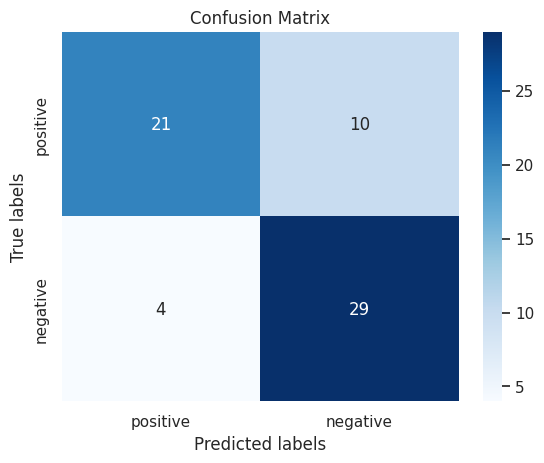

Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.68      0.75        31
           1       0.74      0.88      0.81        33

    accuracy                           0.78        64
   macro avg       0.79      0.78      0.78        64
weighted avg       0.79      0.78      0.78        64



In [102]:
matrix = confusion_matrix(y_test, x_test_prediction)
sns.heatmap(matrix, annot=True, fmt='d', cmap='Blues', xticklabels=["positive", "negative"], yticklabels=["positive", "negative"])
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

print("Classification Report:")
print(classification_report(y_test,x_test_prediction))

In [103]:
naive_bayes = GaussianNB()
naive_bayes.fit(x_train, y_train)
y_pred  =  naive_bayes.predict(x_test)

In [104]:
x_naive_prediction = naive_bayes.predict(x_train)
train_naive_accuracy = accuracy_score(x_naive_prediction, y_train)

In [105]:
print('Accuracy score of the training data : ', f"{round(train_naive_accuracy*100,2)}%")

Accuracy score of the training data :  87.75%


In [106]:
x_naive_test_prediction = naive_bayes.predict(x_test)
test_naive_accuracy = accuracy_score(x_naive_test_prediction, y_test)

In [107]:
print('Accuracy score of the testing data : ', f"{round(test_naive_accuracy*100,2)}%")

Accuracy score of the testing data :  78.12%


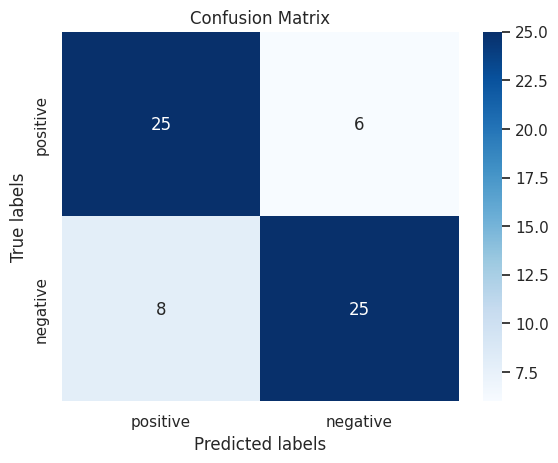

Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.81      0.78        31
           1       0.81      0.76      0.78        33

    accuracy                           0.78        64
   macro avg       0.78      0.78      0.78        64
weighted avg       0.78      0.78      0.78        64



In [108]:
matrix = confusion_matrix(y_test, x_naive_test_prediction)
sns.heatmap(matrix, annot=True, fmt='d', cmap='Blues', xticklabels=["positive", "negative"], yticklabels=["positive", "negative"])
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

print("Classification Report:")
print(classification_report(y_test,x_naive_test_prediction))